<a href="https://colab.research.google.com/github/Naidurella/Employee-management-system/blob/main/MobileNetV2_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Define dataset path
DATASET_PATH = "/content/drive/MyDrive/dataset"

# Load and preprocess images
IMG_SIZE = 224
classes = ['Normal', 'Stroke']

def load_data():
    images, labels = [], []
    for class_idx, class_name in enumerate(classes):
        class_path = os.path.join(DATASET_PATH, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img / 255.0  # Normalize
            images.append(img)
            labels.append(class_idx)

    images = np.array(images)
    labels = np.array(labels)
    labels = to_categorical(labels, num_classes=len(classes))  # One-hot encoding
    return train_test_split(images, labels, test_size=0.2, random_state=42)

# Load data
X_train, X_test, y_train, y_test = load_data()
import numpy as np
import random

# Define population size and mutation rate
POP_SIZE = 10
MUTATION_RATE = 0.2

def initialize_population():
    return [np.random.randint(2, size=IMG_SIZE*IMG_SIZE*3) for _ in range(POP_SIZE)]

def fitness(solution):
    selected_features = np.where(solution == 1)[0]
    if len(selected_features) == 0:
        return 0
    return len(selected_features) / (IMG_SIZE*IMG_SIZE*3)  # Example fitness function

def select_parents(population):
    population = sorted(population, key=fitness, reverse=True)
    return population[:2]

def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:point], parent2[point:]))
    child2 = np.concatenate((parent2[:point], parent1[point:]))
    return child1, child2

def mutate(child):
    for i in range(len(child)):
        if random.random() < MUTATION_RATE:
            child[i] = 1 - child[i]
    return child

def genetic_algorithm():
    population = initialize_population()
    for generation in range(10):
        parents = select_parents(population)
        children = []
        for _ in range(len(population) // 2):
            child1, child2 = crossover(parents[0], parents[1])
            children.append(mutate(child1))
            children.append(mutate(child2))
        population = children
    return select_parents(population)[0]

best_features = genetic_algorithm()

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load base model
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights="imagenet")

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(len(classes), activation="softmax")(x)


# Compile the model
model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=16)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.6523 - loss: 1.5073 - val_accuracy: 0.7964 - val_loss: 0.4302
Epoch 2/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8061 - loss: 0.4226 - val_accuracy: 0.8503 - val_loss: 0.3507
Epoch 3/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8703 - loss: 0.3225 - val_accuracy: 0.7984 - val_loss: 0.4753
Epoch 4/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9099 - loss: 0.2208 - val_accuracy: 0.8603 - val_loss: 0.2799
Epoch 5/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9470 - loss: 0.1547 - val_accuracy: 0.8802 - val_loss: 0.2654
Epoch 6/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9728 - loss: 0.0900 - val_accuracy: 0.9401 - val_loss: 0.1501
Epoch 7/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9748 - loss: 0.0729 - val_accuracy: 0.9401 - val_loss: 0.1635
Epoch 8/500
125/125 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# prompt: generate the accuracy , precission, recall, f1-score for this model efficiently

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'model' and 'X_test', 'y_test' are defined from the previous code
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted') # Use 'weighted' for multi-class
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 365ms/step
Accuracy: 0.9520958083832335
Precision: 0.9522325751596528
Recall: 0.9520958083832335
F1-score: 0.9519068658798907


In [ ]:
import pandas as pd

# Prepare the DataFrame
results_df = pd.DataFrame({
    'y_true': y_true_classes,
    'mobilenet': y_pred_classes
})

results_df.to_csv('/content/drive/MyDrive/mobilenet_results.csv', index=False)
print("Saved MobileNet predictions to Google Drive.")

Saved MobileNet predictions to Google Drive.


In [ ]:
# Saving to Google Drive
np.save("/content/drive/MyDrive/X_test.npy", X_test)
np.save("/content/drive/MyDrive/y_test.npy", y_test)

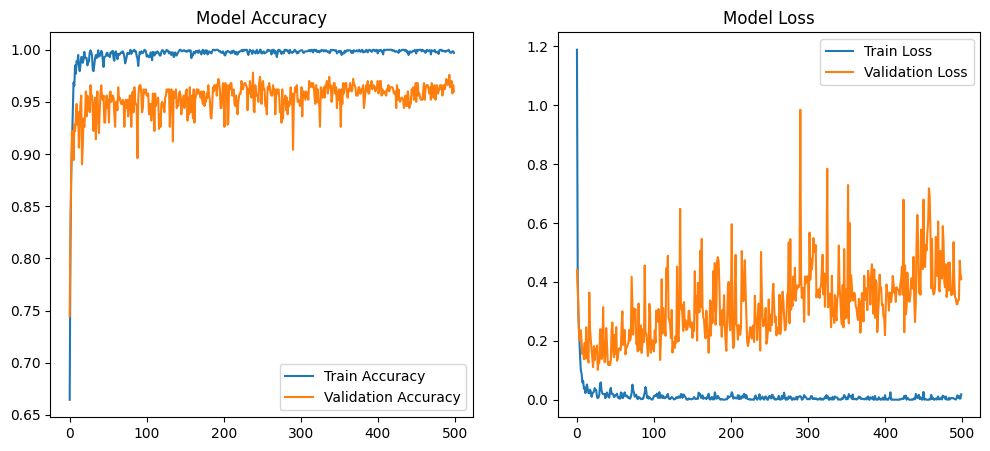

In [ ]:
from matplotlib import pyplot as plt
def plot_results(history):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label="Train Accuracy")
    plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
    plt.legend()
    plt.title("Model Accuracy")

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label="Train Loss")
    plt.plot(history.history['val_loss'], label="Validation Loss")
    plt.legend()
    plt.title("Model Loss")

    plt.show()

plot_results(history)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


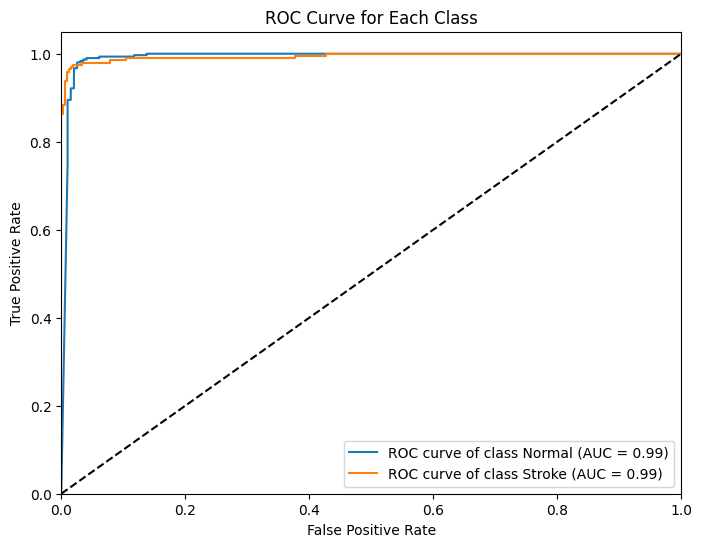

In [ ]:
# prompt: generate the roc of mobilenetv3 roc kfold - 0 (auc =), roc k fold -4

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined from your previous code
# y_test should be the true binary labels (0 or 1)
# y_pred should be the predicted probabilities for the positive class

# Assuming you have y_test and y_pred from your multi-class classification
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded y_test to class labels
y_pred_proba = model.predict(X_test) # Probabilities for each class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = len(classes)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred_proba[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Plot ROC curves for each class
plt.figure(figsize=(8,6))

for i in range(n_classes):
  plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Save the trained model
model.save('/content/drive/MyDrive/Stroke_Detection_with_MobileNetV2.h5')
print("Model saved successfully!")

Model saved successfully!


In [ ]:

# import tkinter as tk
# from tkinter import filedialog
# from tensorflow.keras.models import load_model
# import numpy as np
# import cv2

# # Load trained model
# model = load_model("brain_stroke_model_mac.h5")

# def predict_image():
#     file_path = filedialog.askopenfilename()

#     if not file_path:
#         return

#     img = cv2.imread(file_path)
#     img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
#     img = img / 255.0
#     img = np.expand_dims(img, axis=0)

#     prediction = model.predict(img)
#     class_idx = np.argmax(prediction)
#     result_label.config(text=f"Prediction: {classes[class_idx]}")

In [ ]:


# # GUI
# root = tk.Tk()
# root.title("Brain Stroke Prediction")

# frame = tk.Frame(root)
# frame.pack(pady=20)

# btn_upload = tk.Button(frame, text="Upload CT Image", command=predict_image)
# btn_upload.pack()

# result_label = tk.Label(root, text="", font=("Arial", 16))
# result_label.pack(pady=20)

# root.mainloop()


In [ ]:
# prompt: mobilenet validation accuracy

print(f"Validation Accuracy: {max(history.history['val_accuracy'])}")


Validation Accuracy: 0.9620758295059204


In [ ]:
import os
import tkinter as tk
from tkinter import filedialog
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load trained model
model = load_model("mobile_brain_stroke_model_mac2.h5")

def plot_results(history):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label="Train Accuracy")
    plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
    plt.legend()
    plt.title("Model Accuracy")

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label="Train Loss")
    plt.plot(history.history['val_loss'], label="Validation Loss")
    plt.legend()
    plt.title("Model Loss")

    plt.show()


def predict_image():
    file_path = filedialog.askopenfilename()

    if not file_path:
        return

    img = cv2.imread(file_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    result_label.config(text=f"Prediction: {classes[class_idx]}")

if os.environ.get('DISPLAY','') == '':
    print('No display found. Using non-interactive matplotlib backend.')
    # plot the results
    plot_results(history)
else:
    # GUI
    root = tk.Tk()
    root.title("Brain Stroke Prediction")

    frame = tk.Frame(root)
    frame.pack(pady=20)

    btn_upload = tk.Button(frame, text="Upload CT Image", command=predict_image)
    btn_upload.pack()

    result_label = tk.Label(root, text="", font=("Arial", 16))
    result_label.pack(pady=20)

    root.mainloop()

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'mobile_brain_stroke_model_mac2.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# prompt: test accuracy and validation accuracy

print(f"Test Accuracy: {max(history.history['accuracy'])}")


Test Accuracy: 1.0


In [ ]:
# validation accuracy
print(f"Validation Accuracy: {max(history.history['val_accuracy']):.4f}")


Validation Accuracy: 0.9621


In [ ]:
# prompt: connect my model to a gradio

!pip install gradio

import gradio as gr
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("brain_stroke_model_mac.h5")
IMG_SIZE = 224
classes = ['Normal', 'Stroke']

def predict_image(image):
    img = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    return classes[class_idx]

iface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="numpy"),
    outputs=gr.Label(num_top_classes=2),
    title="Brain Stroke Prediction",
    description="Upload a CT scan image to predict the presence of a brain stroke."
)

iface.launch()


In [ ]:
# prompt: is this mobilenetv2 or mobilenetv3

The code uses `MobileNetV2`.  The line `from tensorflow.keras.applications import MobileNetV2` and the subsequent instantiation of the model clearly indicate that MobileNetV2 is being used, not MobileNetV3.
